<a href="https://colab.research.google.com/github/sabamontazeri/machine-learning-course/blob/main/abbaszade_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:

##importing dataset
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
Data=pd.read_csv('/content/nistro.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Preprocessing Data###

In [11]:
# @title unique list
##deleting the columns with
for  variable in Data.columns:
  print(variable,len(Data[variable].unique()))

Severity 4
StartLat 1315
StartLng 1315
Distance 259
Street 1033
City 646
State 43
Zipcode 1098
Temperature 210
Humidity 97
Pressure 228
Visibility 26
WindSpeed 41
Precipitation 28
WeatherCondition 28
Amenity 2
Bump 1
Crossing 2
GiveWay 2
Junction 2
NoExit 1
Railway 2
Roundabout 1
Station 2
Stop 2
TrafficCalming 2
TrafficSignal 2


In [16]:
# @title encoding
##deleting columns with zero variance
Data.drop(['Roundabout','Bump','NoExit'],axis=1)
#droping null rows
Data.dropna()
##Ordinal encoding
from sklearn.preprocessing import OrdinalEncoder
encoder=OrdinalEncoder()
data = encoder.fit_transform(Data)
data=pd.DataFrame(data,columns=Data.columns)

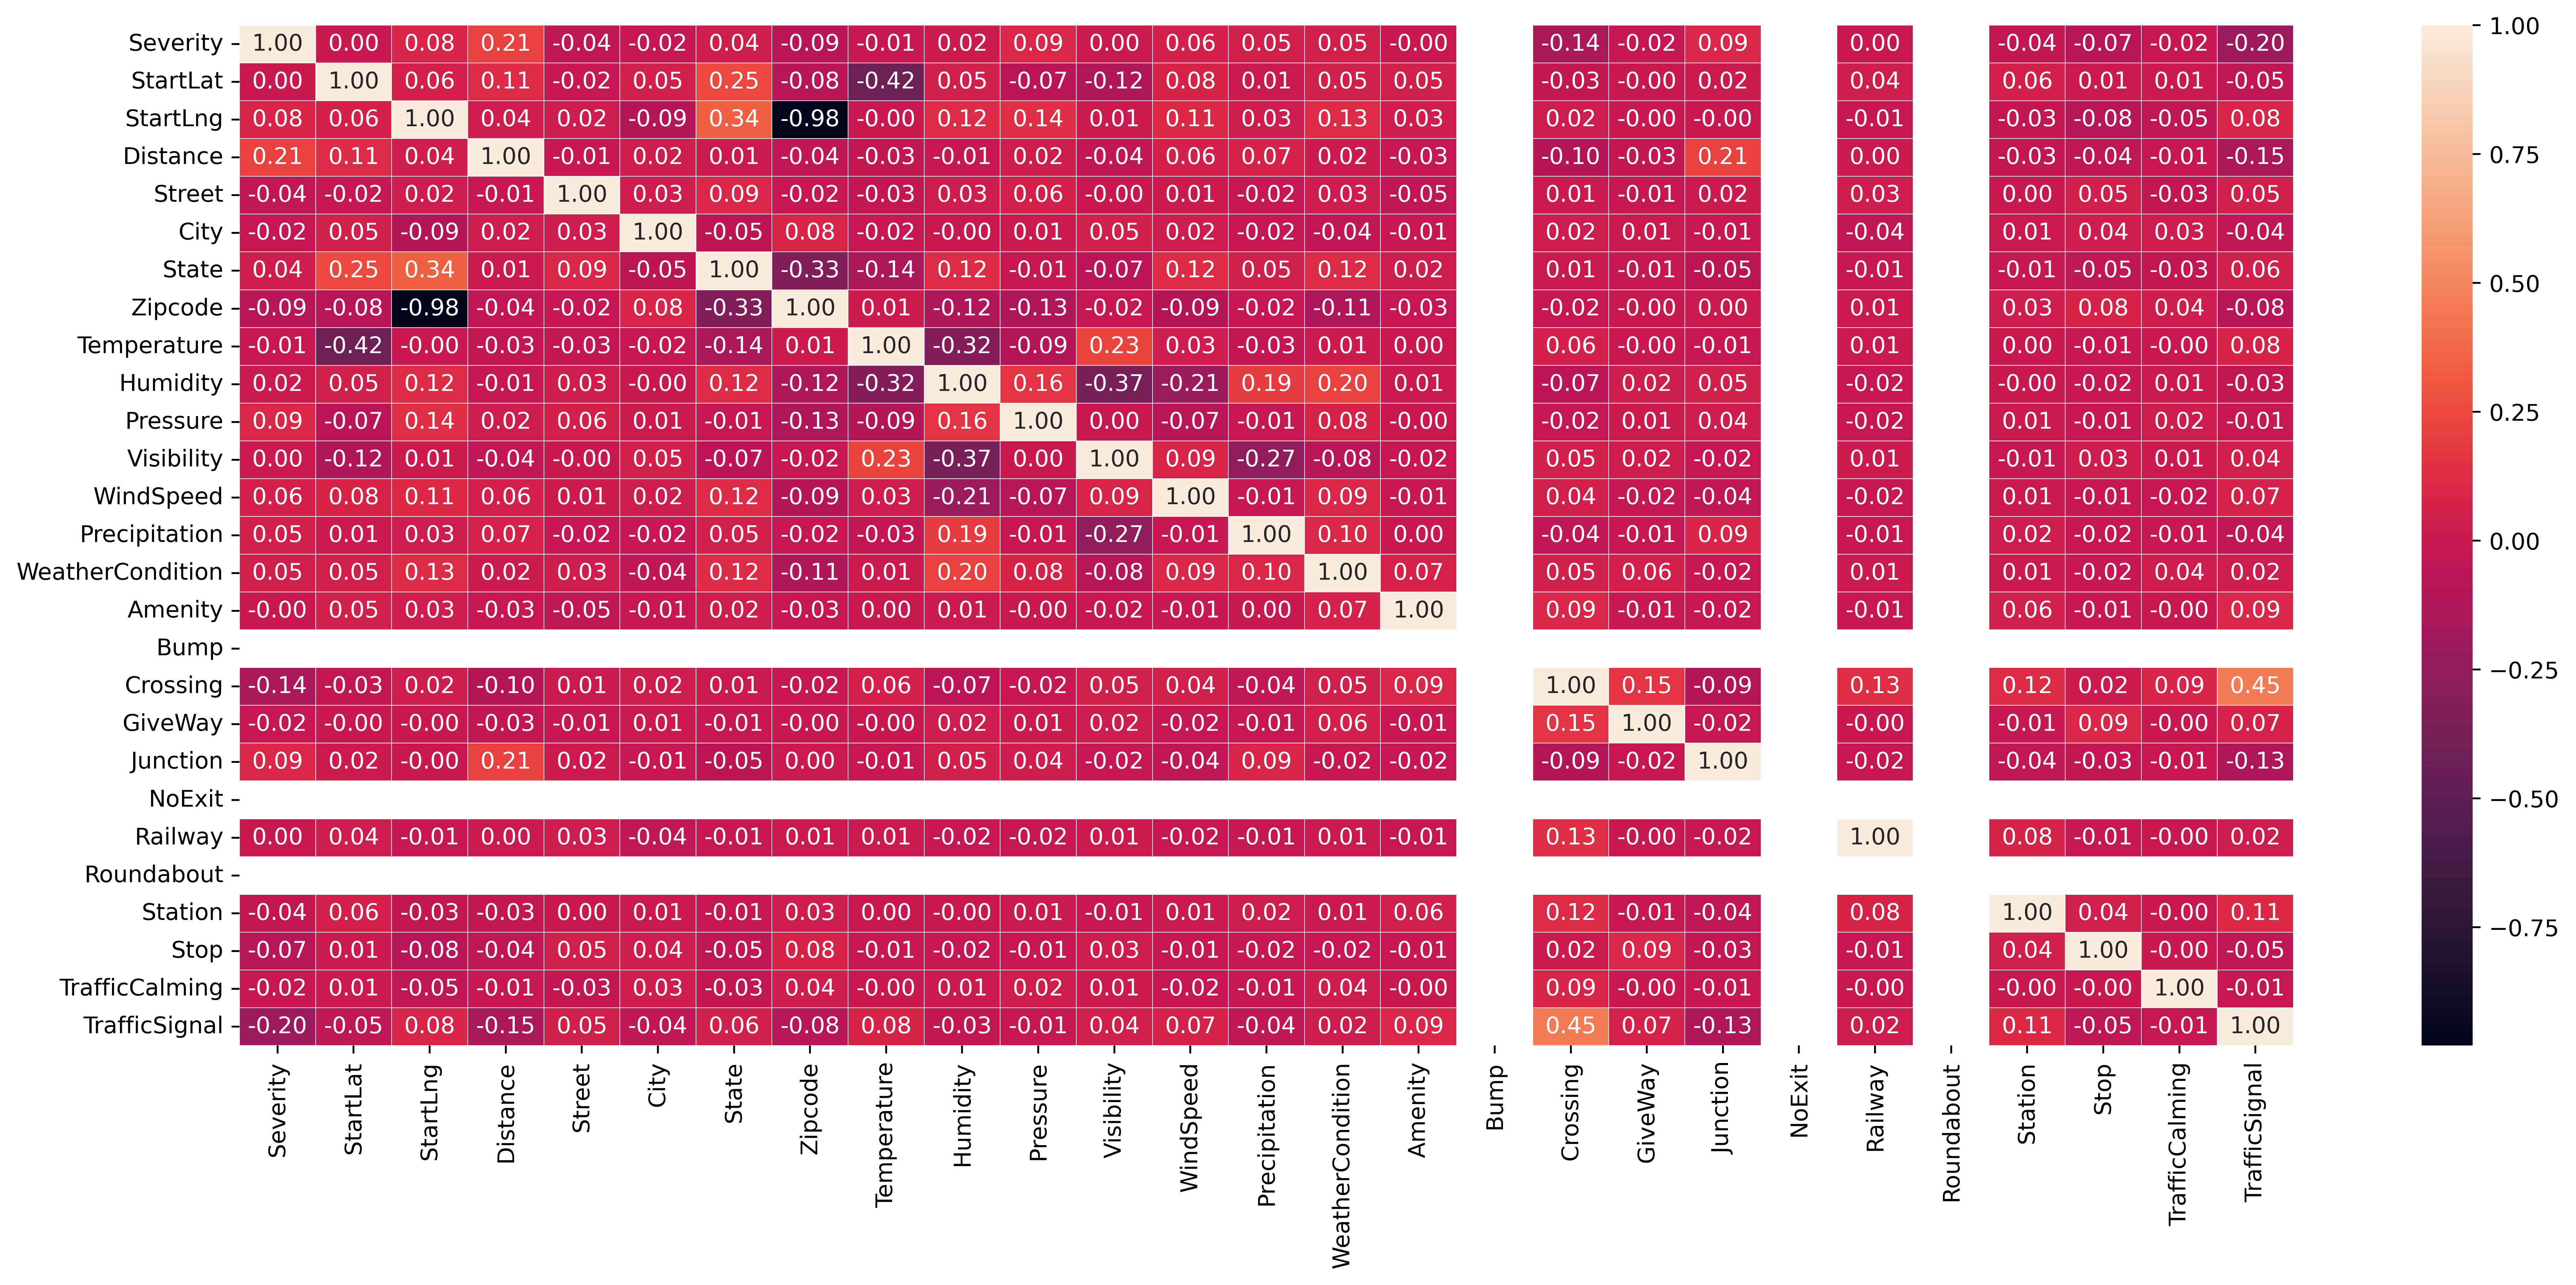

In [ ]:
# @title Correlation plot
##Deleting features with high correlations
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(20,8), dpi =500)
corr = data.corr(method = 'pearson')
sns.heatmap(corr,annot=True,fmt=".2f", linewidth=.01)
plt.show()


In [17]:
##droping state for high correlation with StartLng
data.drop("State",axis=1)

,Severity,StartLat,StartLng,Distance,Street,City,Zipcode,Temperature,Humidity,Pressure,...,Crossing,GiveWay,Junction,NoExit,Railway,Roundabout,Station,Stop,TrafficCalming,TrafficSignal
0,1.0,581.0,896.0,0.0,412.0,240.0,257.0,198.0,41.0,60.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,1046.0,1170.0,121.0,20.0,143.0,120.0,92.0,25.0,192.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,315.0,385.0,0.0,434.0,445.0,776.0,126.0,36.0,168.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,1152.0,703.0,0.0,719.0,322.0,556.0,34.0,59.0,173.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,723.0,753.0,0.0,849.0,415.0,422.0,133.0,61.0,92.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1323,3.0,808.0,146.0,220.0,418.0,17.0,1010.0,143.0,18.0,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1324,1.0,401.0,259.0,0.0,499.0,408.0,847.0,131.0,66.0,146.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1325,1.0,526.0,202.0,0.0,911.0,540.0,873.0,113.0,76.0,78.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1326,1.0,416.0,291.0,0.0,214.0,72.0,932.0,168.0,43.0,137.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
# @ Scaling data
##Scaling data is essential cause the algorithm is instance based
from sklearn.preprocessing import MinMaxScaler
Scaler=MinMaxScaler()
data=Scaler.fit_transform(data)

In [ ]:
# @ Spliting data
from sklearn.model_selection import train_test_split
X=data.drop("TrafficSignal",axis=1)
y=data["TrafficSignal"]
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.15, random_state=42,shuffle=True)

###Clustering###

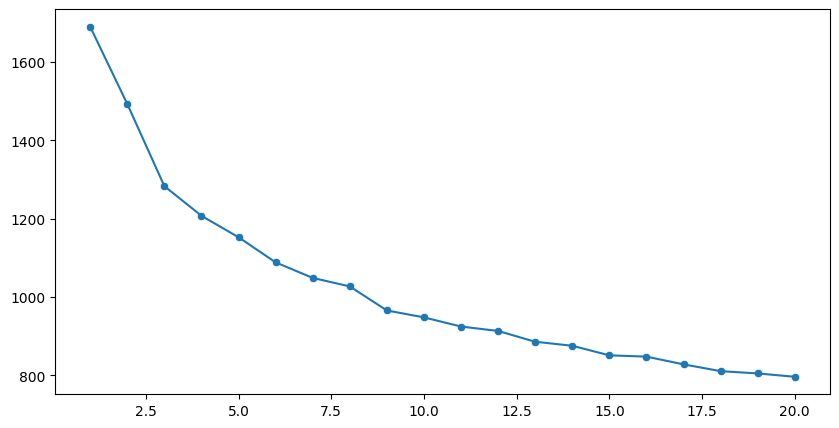

In [22]:
# @title Saving errors of kmeans for ploting elbow
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

error = []
for n_clusters in range(1, 21):
    model = KMeans(init='k-means++',
                   n_clusters=n_clusters,
                   max_iter=500,
                   random_state=24,n_init='auto')
    model.fit(data)
    error.append(model.inertia_)


# @title ploting elbow
import seaborn as sns
plt.figure(figsize=(10, 5))
sns.lineplot(x=range(1, 21), y=error)
sns.scatterplot(x=range(1, 21), y=error)
plt.show()

In [23]:
# @title pca
##PCA is for projecting tha datas into two lines and thus two dimensions
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
pca = PCA(n_components = 2)
X_principal = pca.fit_transform(data)
X_principal = pd.DataFrame(X_principal)
X_principal.columns = ['P1', 'P2']

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


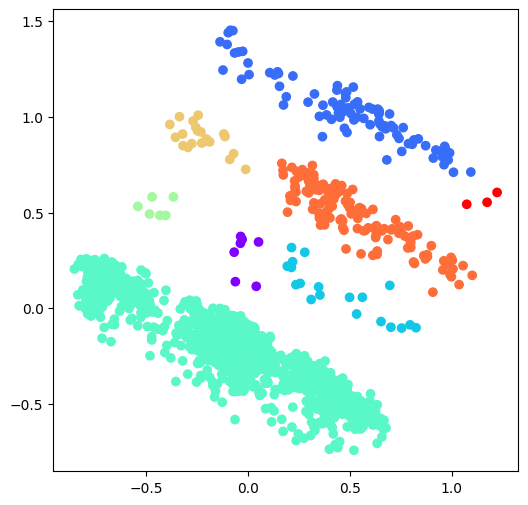

In [24]:
#@title single linkage
#using single linkage with the clusters in derived in the elbow method
from sklearn.cluster import AgglomerativeClustering
hierarchical_cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='single')
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = hierarchical_cluster.fit_predict(X_principal), cmap ='rainbow')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


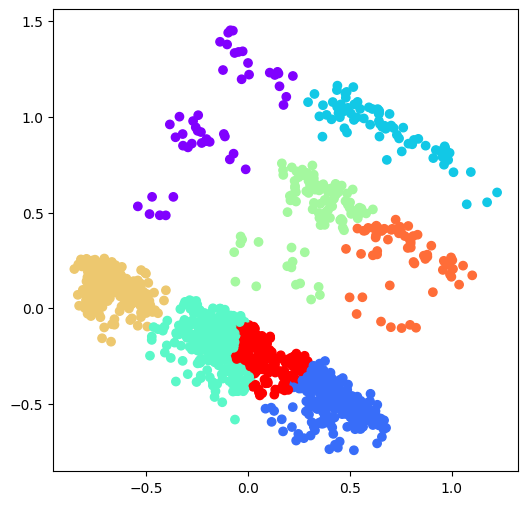

In [34]:
#@title central linkage
#using central linkage with the clusters in derived in the elbow method
hierarchical_cluster2 = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
clustering = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward').fit(X_principal)
plt.figure(figsize =(6, 6))
plt.scatter(X_principal['P1'], X_principal['P2'],
           c = hierarchical_cluster2.fit_predict(X_principal), cmap ='rainbow')
plt.show()

In [43]:
from sklearn.metrics import mean_squared_error
labels=hierarchical_cluster.fit_predict(X_principal)
# Predict the cluster for Datas

# Calculate the mean squared error for centroid
mse = mean_squared_error(labels, hierarchical_cluster.labels_)
print("Mean Squared Error (MSE)for Centroid:", mse)

Mean Squared Error (MSE)for Centroid: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(
